In [24]:
import numpy as np
import pandas as pd
from sklearn import metrics
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
train = pd.read_csv("house sale.csv")
train.describe()

,Number,Bedrooms,Baths,SquareFeet,YearBuilt,YearSold,CostPerSqFt,SalePrice
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,465.000000,3.194833,1.779333,1552.539290,1945.903122,2009.365985,83.291561,133203.720129
std,268.323499,0.943293,0.743154,685.007177,37.209902,3.124149,35.762241,77959.624697
min,1.000000,0.000000,0.000000,0.000000,1870.000000,2005.000000,0.000000,7000.000000
25%,233.000000,3.000000,1.000000,1136.000000,1900.000000,2007.000000,60.820000,83000.000000
50%,465.000000,3.000000,1.750000,1423.000000,1956.000000,2009.000000,82.880000,119340.000000
75%,697.000000,4.000000,2.000000,1824.000000,1973.000000,2012.000000,105.770000,162500.000000
max,929.000000,8.000000,6.000000,6815.000000,2013.000000,2015.000000,258.790000,606000.000000


In [26]:
feature_names = ['Bedrooms','Baths','SquareFeet','YearBuilt','YearSold']

In [27]:
data = pd.DataFrame()

In [28]:
data['Bedrooms']=train['Bedrooms']
data['Baths']=train['Baths']
data['SquareFeet']=train['SquareFeet']
data['YearBuilt']=train['YearBuilt']
data['YearSold']=train['YearSold']
data['SalePrice']=train['SalePrice']

In [35]:
data.head()

,Bedrooms,Baths,SquareFeet,YearBuilt,YearSold,SalePrice
0,2,1.0,1120,1993,2005,7000
1,3,1.0,1224,1900,2006,27000
2,4,1.0,1540,1970,2006,28000
3,3,1.0,1154,1900,2006,30000
4,3,1.0,1277,1900,2005,30750


[]

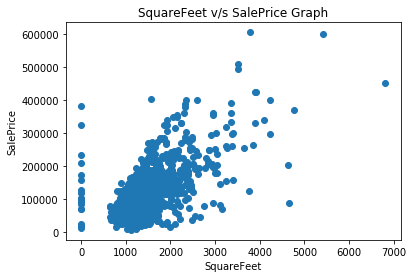

In [36]:
plt.scatter(data['SquareFeet'], data['SalePrice'])
plt.title('SquareFeet v/s SalePrice Graph')
plt.xlabel('SquareFeet')
plt.ylabel('SalePrice')
plt.plot()

In [30]:
X = data[feature_names]
X

,Bedrooms,Baths,SquareFeet,YearBuilt,YearSold
0,2,1.00,1120,1993,2005
1,3,1.00,1224,1900,2006
2,4,1.00,1540,1970,2006
3,3,1.00,1154,1900,2006
4,3,1.00,1277,1900,2005
5,3,1.00,1079,1900,2005
6,2,1.00,768,1955,2005
7,2,1.50,1152,1900,2005
8,3,2.00,912,1900,2005
9,3,2.00,1488,1900,2005


In [31]:
y = data.SalePrice
print(y)

0        7000
1       27000
2       28000
3       30000
4       30750
        ...  
924    325000
925    360000
926    362500
927    405000
928    606000
Name: SalePrice, Length: 929, dtype: int64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=20)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model=RandomForestRegressor()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
r2score=eval("%.2f" % r2_score(y_test,prediction))
raw_data=np.sqrt(mean_squared_error(y_test,prediction))
print("RandomForestRegressor :\n\tr2 score: ",r2score,"\n\trmse:",raw_data)

RandomForestRegressor :
	r2 score:  0.64 
	rmse: 48139.31149789422


c:\users\lenovo\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
naming=['Bedrooms','Baths','SquareFeet','YearBuilt','YearSold']
B=[]
print("ENTER VALUE FOR\n")
for i in naming:
  print(i)
  B.append(input())
X_value=np.reshape(B,(1, -1))
getresult=RandomForestRegressor()
getresult.fit(X_train,y_train)
predictions=getresult.predict(X_value)
print("House Sale Price:\r")
print(predictions.astype('int'))

ENTER VALUE FOR

Bedrooms
2
Baths
1
SquareFeet
1120
YearBuilt
1993
YearSold
2005
House Sale Price:
[43500]


c:\users\lenovo\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
